In [1]:
# 分析时间：2012年1月1日-2022年12月31日，总共11年时间
start_date_str = "2012-01-01"
end_date_str = "2022-12-31"

In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

%matplotlib inline

# plt.style.use('fivethirtyeight')

# import warnings
# warnings.filterwarnings('ignore')

In [3]:
import warnings


warnings.simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

%config InlineBackend.figure_format = 'retina'

In [4]:
start_date = datetime.datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.datetime.strptime(end_date_str, "%Y-%m-%d")
print(start_date, end_date)

2012-01-01 00:00:00 2022-12-31 00:00:00


In [5]:
# 到期收益率
raw_yield_to_maturity_df = pd.read_excel('./data/国债到期收益率.xlsx')
raw_yield_to_maturity_df = raw_yield_to_maturity_df.rename(columns={'指标名称': 'Date',
       '国债到期收益率:6个月': "6M", '国债到期收益率:1年': "1Y", '国债到期收益率:2年': "2Y", '国债到期收益率:3年': "3Y",
       '国债到期收益率:4年': "4Y", '国债到期收益率:5年': "5Y", '国债到期收益率:6年': "6Y", '国债到期收益率:7年': "7Y", 
        '国债到期收益率:8年': "8Y",'国债到期收益率:9年': "9Y", '国债到期收益率:10年': "10Y", '国债到期收益率:15年': "15Y", 
        '国债到期收益率:20年': "20Y", '国债到期收益率:30年': "30Y"})
raw_yield_to_maturity_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2008-07-01,3.2769,3.4474,3.8065,4.0301,4.1697,4.3093,4.3498,4.3903,4.4292,4.4682,4.5072,4.9618,4.9639,4.9498
1,2008-07-02,3.4055,3.5461,3.8015,3.9506,4.0883,4.2260,4.3019,4.3778,4.4282,4.4787,4.5291,4.9442,4.9462,4.9501
2,2008-07-03,3.3343,3.4972,3.8687,3.9820,4.1085,4.2350,4.3163,4.3976,4.4436,4.4896,4.5356,4.9453,4.9469,4.9501
3,2008-07-04,3.3397,3.4763,3.8179,3.9854,4.1031,4.2209,4.3183,4.4157,4.4618,4.5080,4.5542,4.9469,4.9479,4.9501
4,2008-07-07,3.3679,3.4796,3.8138,3.9561,4.0850,4.2140,4.2849,4.3559,4.4215,4.4871,4.5527,4.9226,4.9285,4.9404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,2023-03-13,2.1958,2.2696,2.4373,2.5289,2.6127,2.6965,2.7655,2.8345,2.8473,2.8600,2.8728,3.0310,3.1147,3.2772
3668,2023-03-14,2.1950,2.2655,2.4475,2.5215,2.6046,2.6877,2.7591,2.8305,2.8417,2.8528,2.8640,3.0196,3.1047,3.2692
3669,2023-03-15,2.2050,2.2638,2.4432,2.5278,2.6121,2.6963,2.7663,2.8363,2.8474,2.8584,2.8695,3.0152,3.1033,3.2700
3670,2023-03-16,2.1799,2.2598,2.4193,2.5182,2.5953,2.6723,2.7483,2.8242,2.8342,2.8441,2.8541,2.9998,3.0857,3.2503


In [6]:
raw_yield_to_maturity_df.columns

Index(['Date', '6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y',
       '10Y', '15Y', '20Y', '30Y'],
      dtype='object')

In [7]:
# 计算利差: Spread
tenor_str_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y',
       '10Y', '15Y', '20Y', '30Y']
for tenor_str in tenor_str_list:
    raw_yield_to_maturity_df['Spread_'+ tenor_str] =raw_yield_to_maturity_df[tenor_str] - raw_yield_to_maturity_df[tenor_str].shift(1)
raw_yield_to_maturity_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,...,Spread_4Y,Spread_5Y,Spread_6Y,Spread_7Y,Spread_8Y,Spread_9Y,Spread_10Y,Spread_15Y,Spread_20Y,Spread_30Y
0,2008-07-01,3.2769,3.4474,3.8065,4.0301,4.1697,4.3093,4.3498,4.3903,4.4292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-07-02,3.4055,3.5461,3.8015,3.9506,4.0883,4.2260,4.3019,4.3778,4.4282,...,-0.0814,-0.0833,-0.0479,-0.0125,-0.0010,0.0105,0.0219,-0.0176,-0.0177,0.0003
2,2008-07-03,3.3343,3.4972,3.8687,3.9820,4.1085,4.2350,4.3163,4.3976,4.4436,...,0.0202,0.0090,0.0144,0.0198,0.0154,0.0109,0.0065,0.0011,0.0007,0.0000
3,2008-07-04,3.3397,3.4763,3.8179,3.9854,4.1031,4.2209,4.3183,4.4157,4.4618,...,-0.0054,-0.0141,0.0020,0.0181,0.0182,0.0184,0.0186,0.0016,0.0010,0.0000
4,2008-07-07,3.3679,3.4796,3.8138,3.9561,4.0850,4.2140,4.2849,4.3559,4.4215,...,-0.0181,-0.0069,-0.0334,-0.0598,-0.0403,-0.0209,-0.0015,-0.0243,-0.0194,-0.0097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,2023-03-13,2.1958,2.2696,2.4373,2.5289,2.6127,2.6965,2.7655,2.8345,2.8473,...,0.0033,0.0015,-0.0013,-0.0040,-0.0015,0.0010,0.0035,0.0110,0.0063,0.0013
3668,2023-03-14,2.1950,2.2655,2.4475,2.5215,2.6046,2.6877,2.7591,2.8305,2.8417,...,-0.0081,-0.0088,-0.0064,-0.0040,-0.0056,-0.0072,-0.0088,-0.0114,-0.0100,-0.0080
3669,2023-03-15,2.2050,2.2638,2.4432,2.5278,2.6121,2.6963,2.7663,2.8363,2.8474,...,0.0075,0.0086,0.0072,0.0058,0.0057,0.0056,0.0055,-0.0044,-0.0014,0.0008
3670,2023-03-16,2.1799,2.2598,2.4193,2.5182,2.5953,2.6723,2.7483,2.8242,2.8342,...,-0.0168,-0.0240,-0.0180,-0.0121,-0.0132,-0.0143,-0.0154,-0.0154,-0.0176,-0.0197


In [8]:
yield_to_maturity_df = raw_yield_to_maturity_df[(raw_yield_to_maturity_df['Date']>=start_date)
                                                & (raw_yield_to_maturity_df['Date']<=end_date)].reset_index(drop=True)

## 1.债券收益率统计

统计样本均值、样本的标准偏差、第一阶样本自相关、第20阶样本自相关

In [9]:
def autocorrelation(x,lags):#计算lags阶以内的自相关系数，返回lags个值，将序列均值、标准差视为不变
    n = len(x)
    x = np.array(x)
    variance = x.var()
    x = x-x.mean()
    result = np.correlate(x, x, mode = 'full')[-n+1:-n+lags+1]/(variance*(np.arange(n-1,n-1-lags,-1)))
    return result[lags-1]

In [10]:
N = yield_to_maturity_df.shape[0]

yield_stats_df = pd.DataFrame()
sample_mean_list = []
sample_std_list = []
sample_1_lags_list = []
sample_20_lags_list = []
for tenor_str in tenor_str_list:
    
    sample_mean = yield_to_maturity_df[tenor_str].mean()
    sample_std = yield_to_maturity_df[tenor_str].std() * np.sqrt(N)/np.sqrt(N-1)
    #sample_std = yield_to_maturity_df[tenor_str].std()
    #sample_std = np.std(yield_to_maturity_df[tenor_str])
    print(tenor_str, sample_std)
    sample_1_lags = autocorrelation(yield_to_maturity_df[tenor_str],1)
    sample_20_lags = autocorrelation(yield_to_maturity_df[tenor_str],20)
    
    sample_mean_list.append(sample_mean)
    sample_std_list.append(sample_std)
    sample_1_lags_list.append(sample_1_lags)
    sample_20_lags_list.append(sample_20_lags)
    
yield_stats_df['Tenor'] = tenor_str_list
yield_stats_df['Mean'] = sample_mean_list
yield_stats_df['Std'] = sample_std_list
yield_stats_df['1_Lags'] = sample_1_lags_list
yield_stats_df['20_Lags'] = sample_20_lags_list
yield_stats_df

6M 0.6105057337076856
1Y 0.5823365615481157
2Y 0.5357738887201737
3Y 0.5247013196966678
4Y 0.5080232909570069
5Y 0.49407019445643063
6Y 0.47464335708900407
7Y 0.4573453296681902
8Y 0.45951625890825487
9Y 0.46253389207815826
10Y 0.4663804415396919
15Y 0.4347146826749767
20Y 0.4611635218354274
30Y 0.4539966931479255


,Tenor,Mean,Std,1_Lags,20_Lags
0,6M,2.613144,0.610506,0.997510,0.919155
1,1Y,2.709559,0.582337,0.998238,0.925805
2,2Y,2.880922,0.535774,0.998401,0.939065
3,3Y,2.981476,0.524701,0.998538,0.944185
4,4Y,3.062613,0.508023,0.998779,0.950003
5,5Y,3.143736,0.494070,0.998302,0.952103
6,6Y,3.228773,0.474643,0.998766,0.957371
7,7Y,3.313797,0.457345,0.998616,0.959091
8,8Y,3.325143,0.459516,0.998824,0.961836
9,9Y,3.336487,0.462534,0.998873,0.963651


## 2.利差统计

统计样本均值、样本的标准偏差、第一阶样本自相关、第20阶样本自相关

In [11]:
spread_stats_df = pd.DataFrame()

sample_spread_mean_list = []
sample_spread_std_list = []
sample_spread_1_lags_list = []
sample_spread_20_lags_list = []
for tenor_str in tenor_str_list:
    tenor_spread_str = "Spread_" + tenor_str
    sample_spread_mean = yield_to_maturity_df[tenor_spread_str].mean() * 10000
    sample_spread_std = yield_to_maturity_df[tenor_spread_str].std() * np.sqrt(N)/np.sqrt(N-1) * 10000
    sample_spread_1_lags = autocorrelation(yield_to_maturity_df[tenor_spread_str],1)
    sample_spread_20_lags = autocorrelation(yield_to_maturity_df[tenor_spread_str],20)
    
    sample_spread_mean_list.append(sample_spread_mean)
    sample_spread_std_list.append(sample_spread_std)
    sample_spread_1_lags_list.append(sample_spread_1_lags)
    sample_spread_20_lags_list.append(sample_spread_20_lags)
    
spread_stats_df['Tenor'] = tenor_str_list
spread_stats_df['Mean'] = sample_spread_mean_list
spread_stats_df['Std'] = sample_spread_std_list
spread_stats_df['1_Lags'] = sample_spread_1_lags_list
spread_stats_df['20_Lags'] = sample_spread_20_lags_list
spread_stats_df

,Tenor,Mean,Std,1_Lags,20_Lags
0,6M,-2.045918,449.796971,0.036352,0.020208
1,1Y,-1.373907,364.664546,0.191969,0.032645
2,2Y,-1.725948,319.113953,0.142251,0.024719
3,3Y,-1.683309,297.643728,0.144978,0.015655
4,4Y,-1.528061,266.268900,0.232445,0.015648
5,5Y,-1.373178,301.192113,0.134865,0.008393
6,6Y,-1.629373,250.162131,0.221349,0.018819
7,7Y,-1.885933,252.555675,0.161451,0.019787
8,8Y,-1.990889,235.599814,0.218196,0.024410
9,9Y,-2.095845,232.452709,0.229011,0.029916


## 3.收益率曲线因子

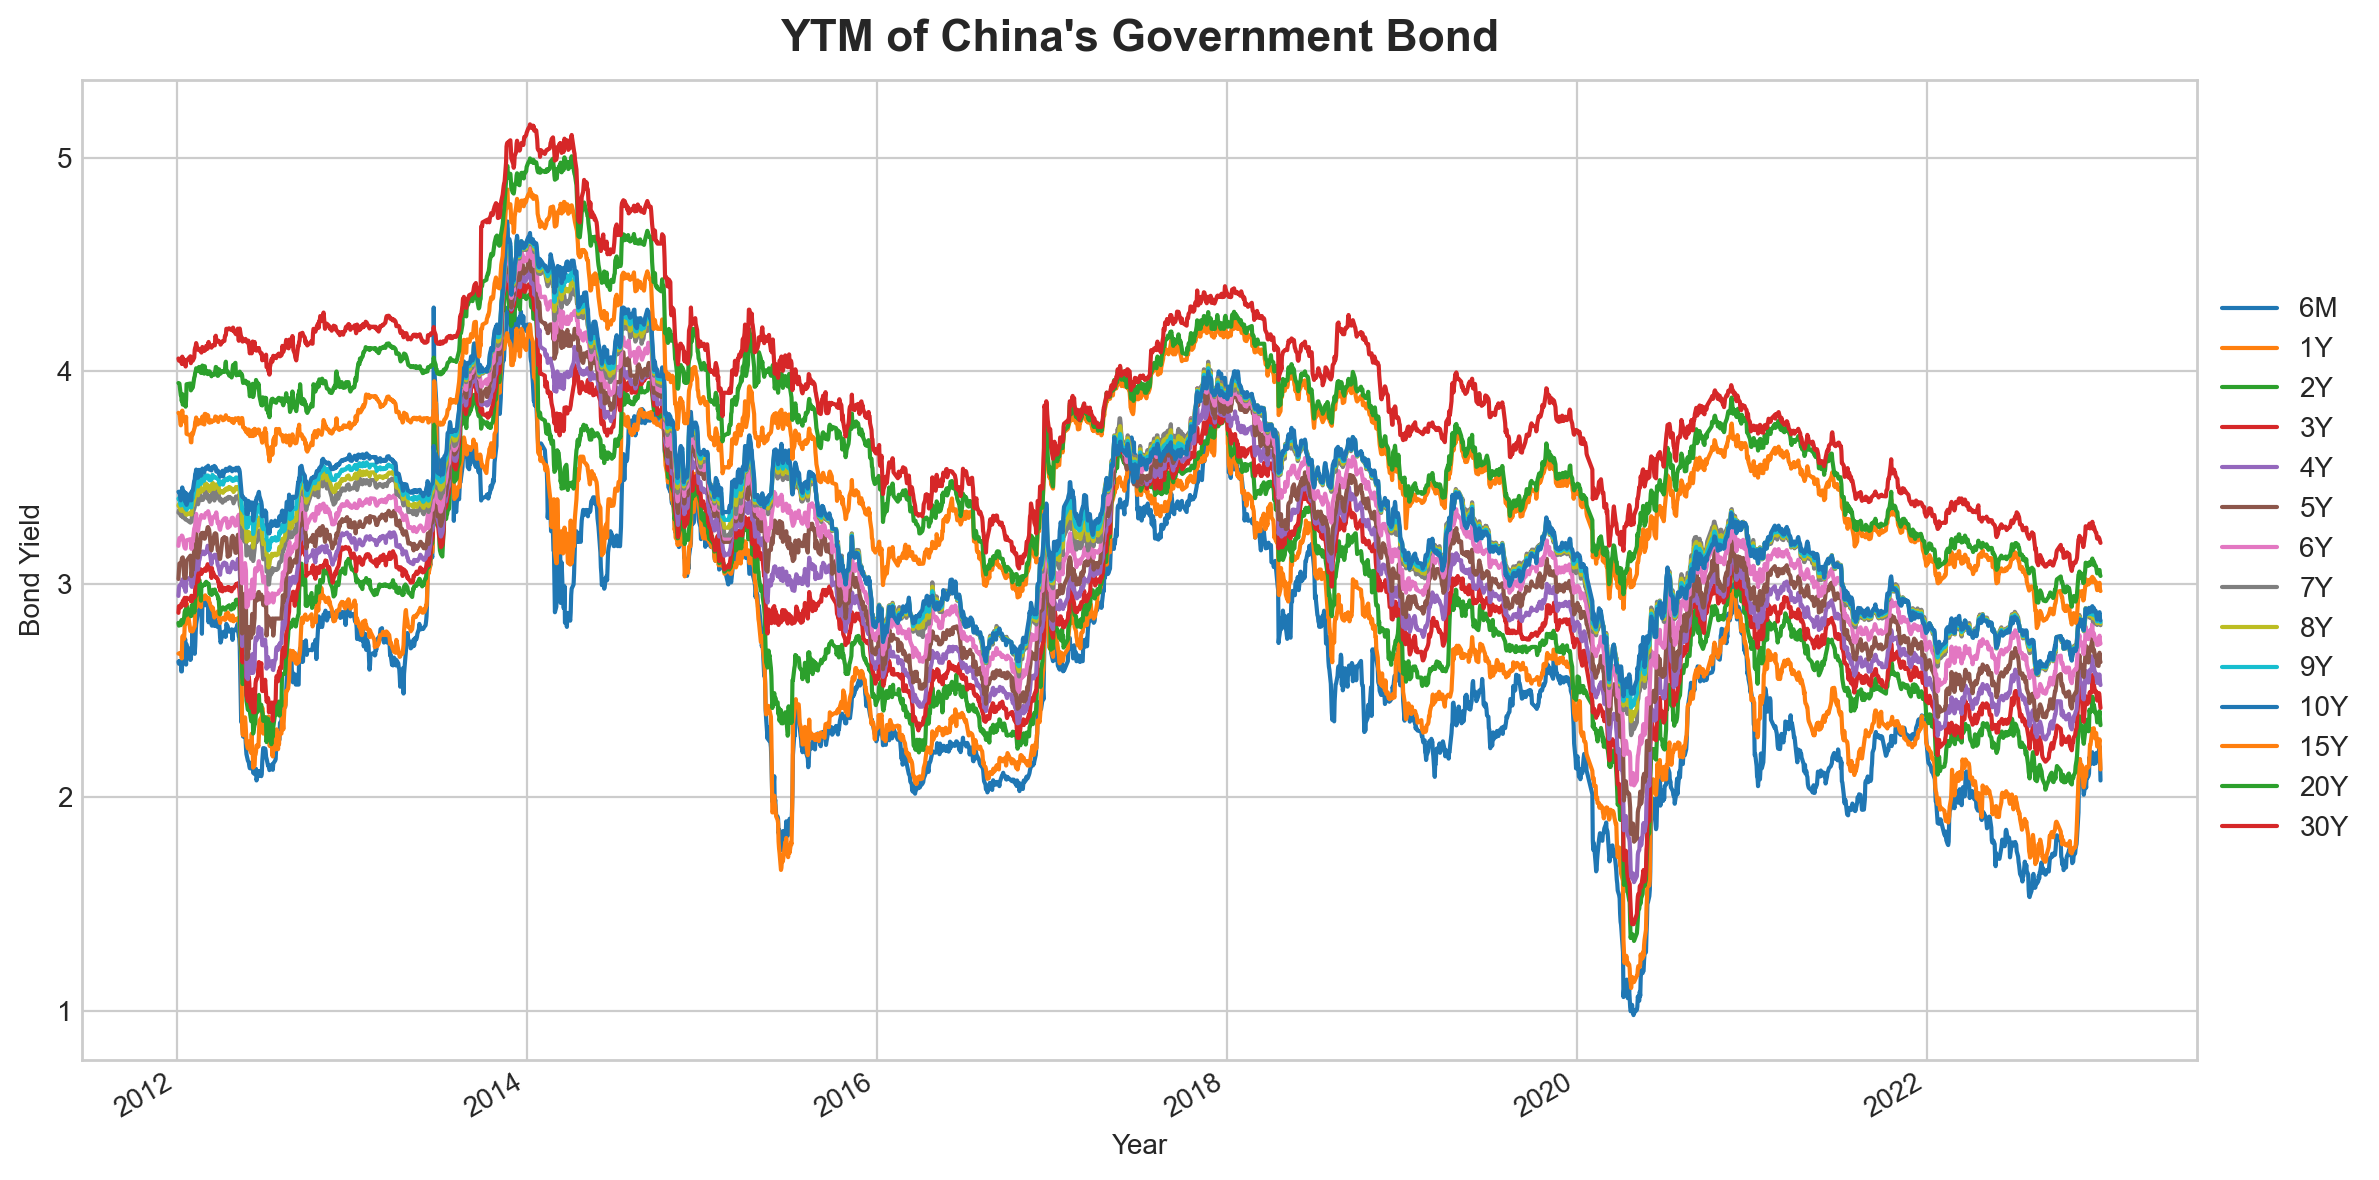

In [12]:
# 绘制6， 12， 24， 36， 60， 120月的债券收益率
fig, ax = plt.subplots(figsize=(12, 6))

for tenor_str in tenor_str_list:
    ax.plot(yield_to_maturity_df['Date'], yield_to_maturity_df[tenor_str], label=tenor_str)
    

ax.set_title("YTM of China's Government Bond")
ax.set_xlabel("Year")
ax.set_ylabel("Bond Yield")
fig.autofmt_xdate()
plt.tight_layout()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [13]:
# 主成分分析
from sklearn.decomposition import PCA

X = yield_to_maturity_df[tenor_str_list]
pca = PCA(n_components=3)
reduced_X =pca.fit_transform(X)
first_x = []
second_x = []
third_x = []
for i in range(len(reduced_X)):
    first_x.append(reduced_X[i][0])
    second_x.append(reduced_X[i][1])
    third_x.append(reduced_X[i][2])

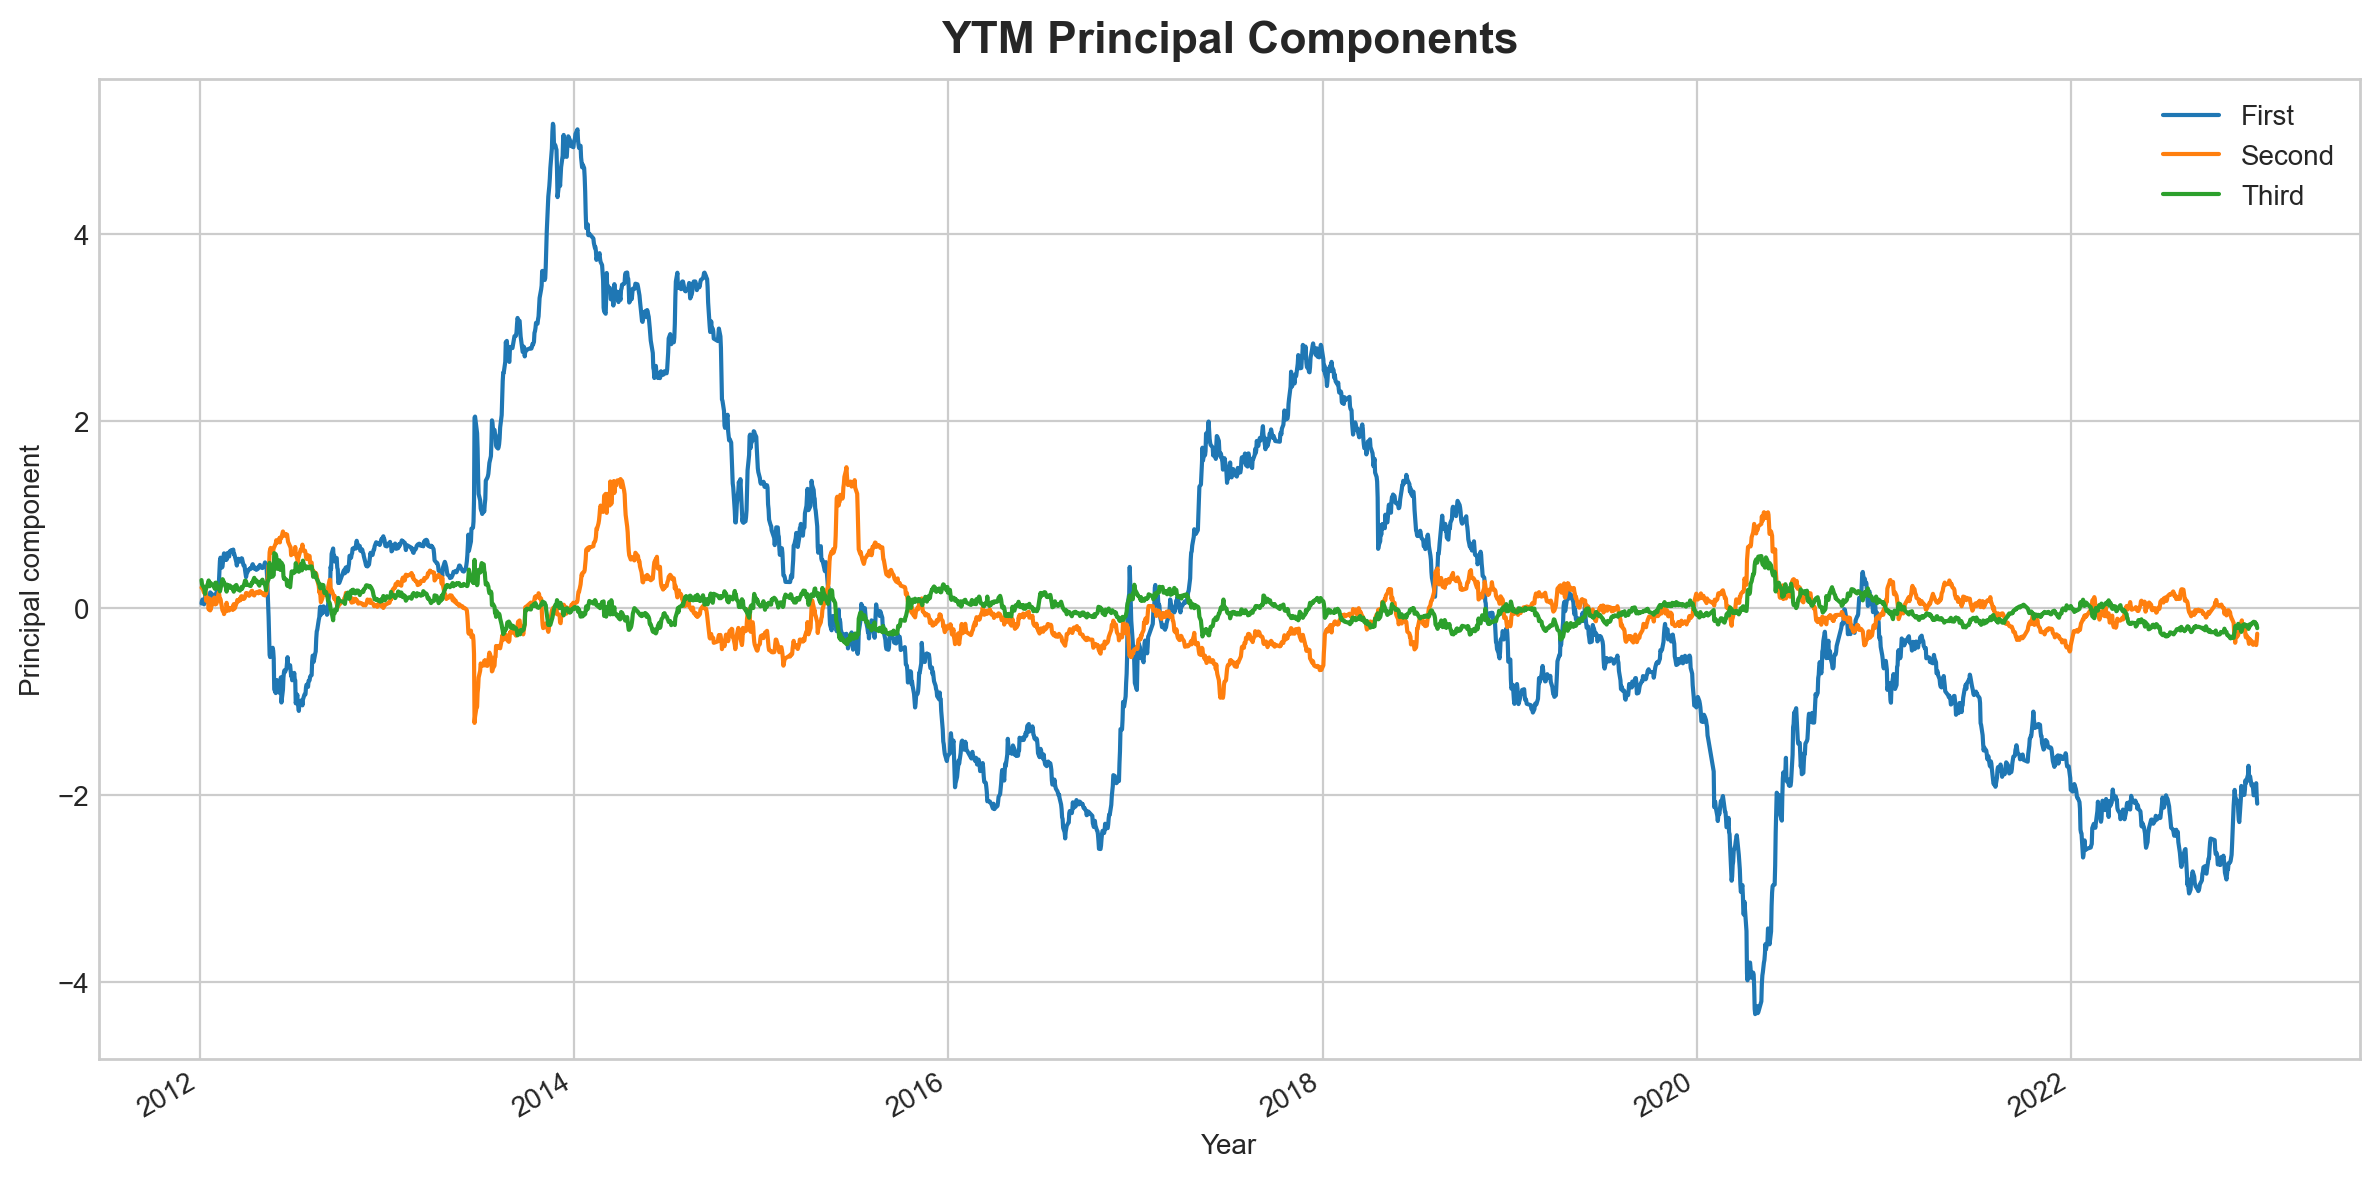

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(yield_to_maturity_df['Date'], first_x, label="First")
ax.plot(yield_to_maturity_df['Date'], second_x, label="Second")
ax.plot(yield_to_maturity_df['Date'], third_x, label="Third")


ax.set_title("YTM Principal Components")
ax.set_xlabel("Year")
ax.set_ylabel("Principal component")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(loc=1)

In [15]:
# 计算r_square

actual = [1,2,3,4,5]
predict = [1,2.5,3,4.9,4.9]

def cal_r_square(actual, predict):
    corr_matrix = np.corrcoef(actual, predict)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    return R_sq

cal_r_square(actual, predict)

0.934602946460654

In [16]:
# 用AR模型来做预测
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

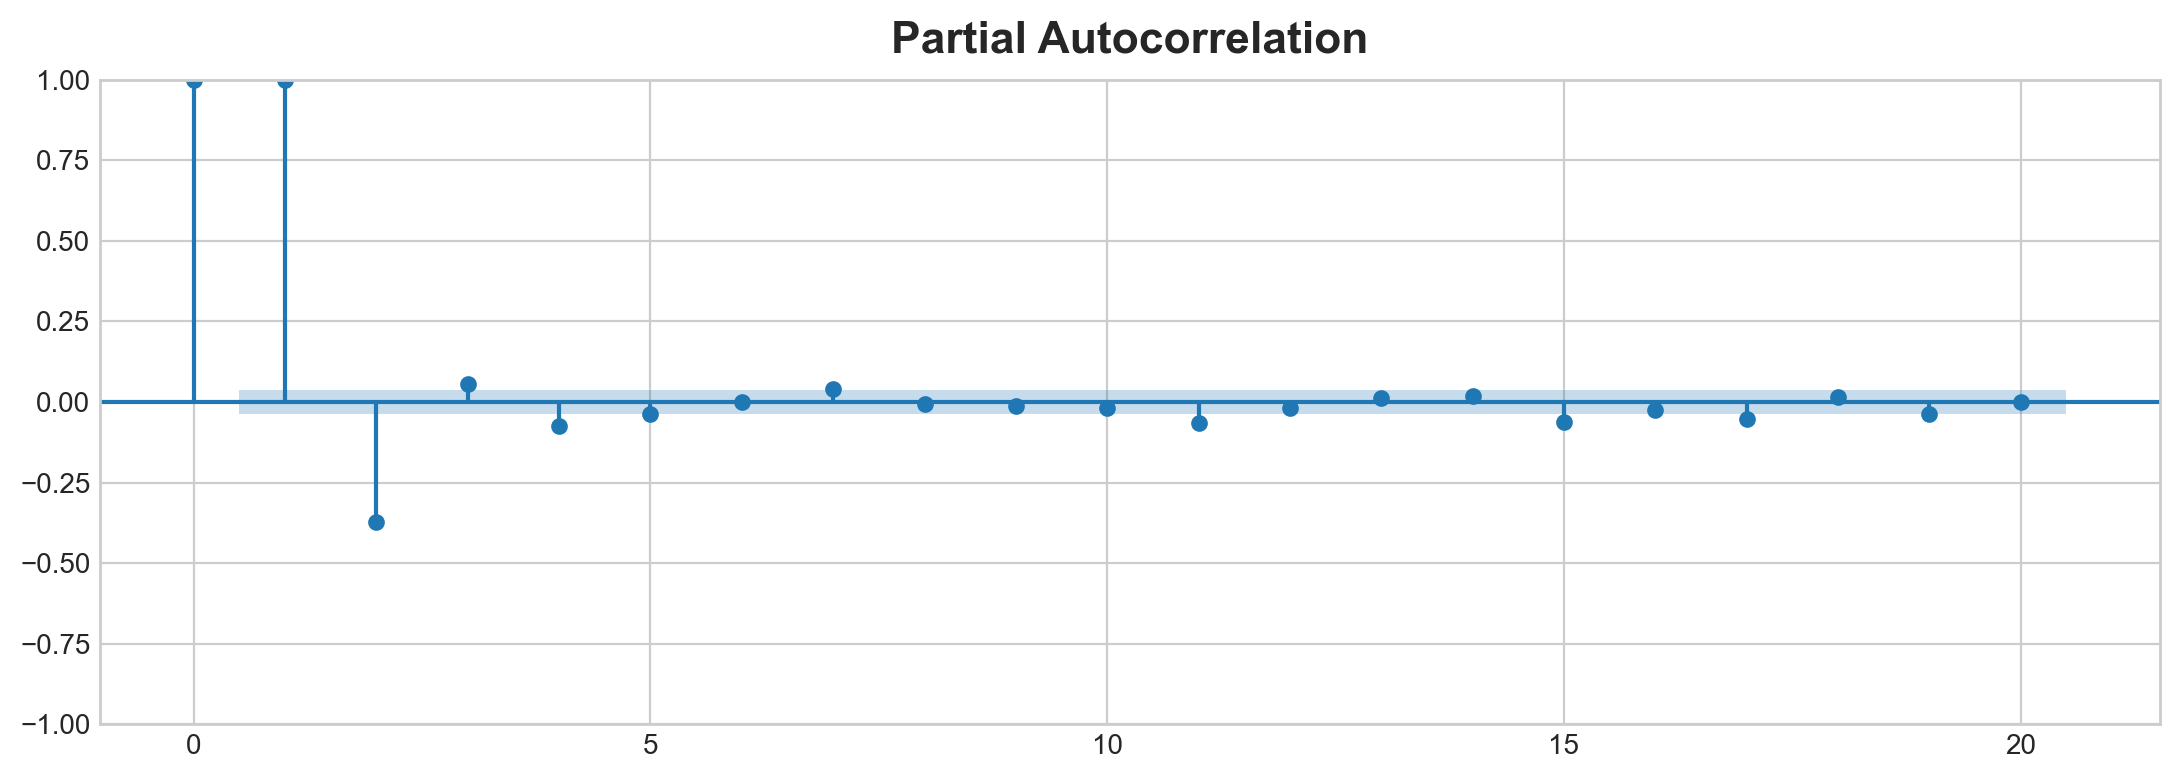

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(first_x, lags=20)

plt.tight_layout()

In [18]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon
    end_idx = train_len
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
            
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'AR':
        pred_AR = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(3,0,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)
            
        return pred_AR

In [19]:
def run_ar_model(data_list):
    all_df = pd.DataFrame({'Value': data_list})
    N =  all_df.shape[0]
    train = all_df[:int(0.75*N)]
    test = all_df[int(0.75*N):]
    TRAIN_LEN = len(train)
    HORIZON = len(test)
    WINDOW = 1

    pred_mean = rolling_forecast(all_df, TRAIN_LEN, HORIZON, WINDOW, 'mean')
    pred_last_value = rolling_forecast(all_df, TRAIN_LEN, HORIZON, WINDOW, 'last')
    pred_AR = rolling_forecast(all_df, TRAIN_LEN, HORIZON, WINDOW, 'AR')

    test['Pred_Mean'] = pred_mean
    test['Pred_Last_Value'] = pred_last_value
    test['Pred_AR'] = pred_AR
    return test

first_test = run_ar_model(first_x)
first_test

C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\s

C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\s

,Value,Pred_Mean,Pred_Last_Value,Pred_AR
2058,-3.456712,0.547387,-3.142946,-3.094845
2059,-3.910161,0.545442,-3.456712,-3.551494
2060,-3.982992,0.543279,-3.910161,-4.065691
2061,-3.882835,0.541083,-3.982992,-4.013544
2062,-3.793950,0.538938,-3.882835,-3.848238
...,...,...,...,...
2739,-1.991758,0.003604,-2.004746,-2.025158
2740,-1.897099,0.002876,-1.991758,-1.984045
2741,-1.875634,0.002183,-1.897099,-1.863109
2742,-2.012802,0.001498,-1.875634,-1.867934


In [20]:
second_test = run_ar_model(second_x)
second_test

C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\s

C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\s

,Value,Pred_Mean,Pred_Last_Value,Pred_AR
2058,0.247314,-0.000115,0.312048,0.325754
2059,0.510093,0.000005,0.247314,0.245775
2060,0.575452,0.000252,0.510093,0.531665
2061,0.650296,0.000531,0.575452,0.599054
2062,0.659689,0.000847,0.650296,0.659371
...,...,...,...,...
2739,-0.370381,0.000649,-0.381183,-0.376699
2740,-0.379578,0.000514,-0.370381,-0.364820
2741,-0.398485,0.000375,-0.379578,-0.376459
2742,-0.352667,0.000230,-0.398485,-0.397826


In [21]:
third_test = run_ar_model(third_x)
third_test

C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\envs\PythonAI\lib\s

,Value,Pred_Mean,Pred_Last_Value,Pred_AR
2058,-0.034098,0.013330,-0.023672,-0.022659
2059,0.031017,0.013307,-0.034098,-0.032935
2060,0.166817,0.013315,0.031017,0.027222
2061,0.191945,0.013390,0.166817,0.157478
2062,0.148845,0.013476,0.191945,0.187230
...,...,...,...,...
2739,-0.153677,0.000331,-0.149215,-0.147066
2740,-0.181470,0.000275,-0.153677,-0.151052
2741,-0.172786,0.000209,-0.181470,-0.177419
2742,-0.181904,0.000146,-0.172786,-0.170137


In [22]:
first_r_squrare = cal_r_square(first_test['Value'], first_test['Pred_AR'])
first_r_squrare

0.9943744949012202

In [23]:
second_r_squrare = cal_r_square(second_test['Value'], second_test['Pred_AR'])
second_r_squrare

0.9797896342559077

In [24]:
third_r_squrare = cal_r_square(third_test['Value'], third_test['Pred_AR'])
third_r_squrare

0.9778108336380917

In [25]:
first_N = len(first_x)
second_N = len(second_x)
third_N = len(third_x)

#样本标准差
first_std = np.std(first_x) * np.sqrt(first_N)/np.sqrt(first_N-1)
second_std = np.std(second_x) * np.sqrt(second_N)/np.sqrt(second_N-1)
third_std = np.std(third_x) * np.sqrt(third_N)/np.sqrt(third_N-1)

# 第一阶自相关系数
first_1_lags = autocorrelation(first_x,1)
second_1_lags = autocorrelation(second_x,1)
third_1_lags = autocorrelation(third_x,1)


# 第20阶自相关系数
first_20_lags = autocorrelation(first_x,20)
second_20_lags = autocorrelation(second_x,20)
third_20_lags = autocorrelation(third_x,20)

pc_stats_df = pd.DataFrame()
pc_stats_df['PC'] = ['First', 'Second', 'Third']
pc_stats_df['Std'] = [first_std, second_std, third_std]
pc_stats_df['1_Lags'] = [first_1_lags, second_1_lags, third_1_lags]
pc_stats_df['20_Lags'] = [first_20_lags, second_20_lags, third_20_lags]
pc_stats_df['R_Square'] = [first_r_squrare, second_r_squrare, third_r_squrare]
pc_stats_df

,PC,Std,1_Lags,20_Lags,R_Square
0,First,1.813091,0.999187,0.960629,0.994374
1,Second,0.355658,0.992832,0.751748,0.979790
2,Third,0.162599,0.982732,0.705034,0.977811


## 4.收益率因子的平稳性分析

In [26]:
first_adf_result = adfuller(first_x)

print(f'ADF Statistic: {first_adf_result[0]}')
print(f'p-value: {first_adf_result[1]}')

ADF Statistic: -1.6060355646799813
p-value: 0.48056096915657454


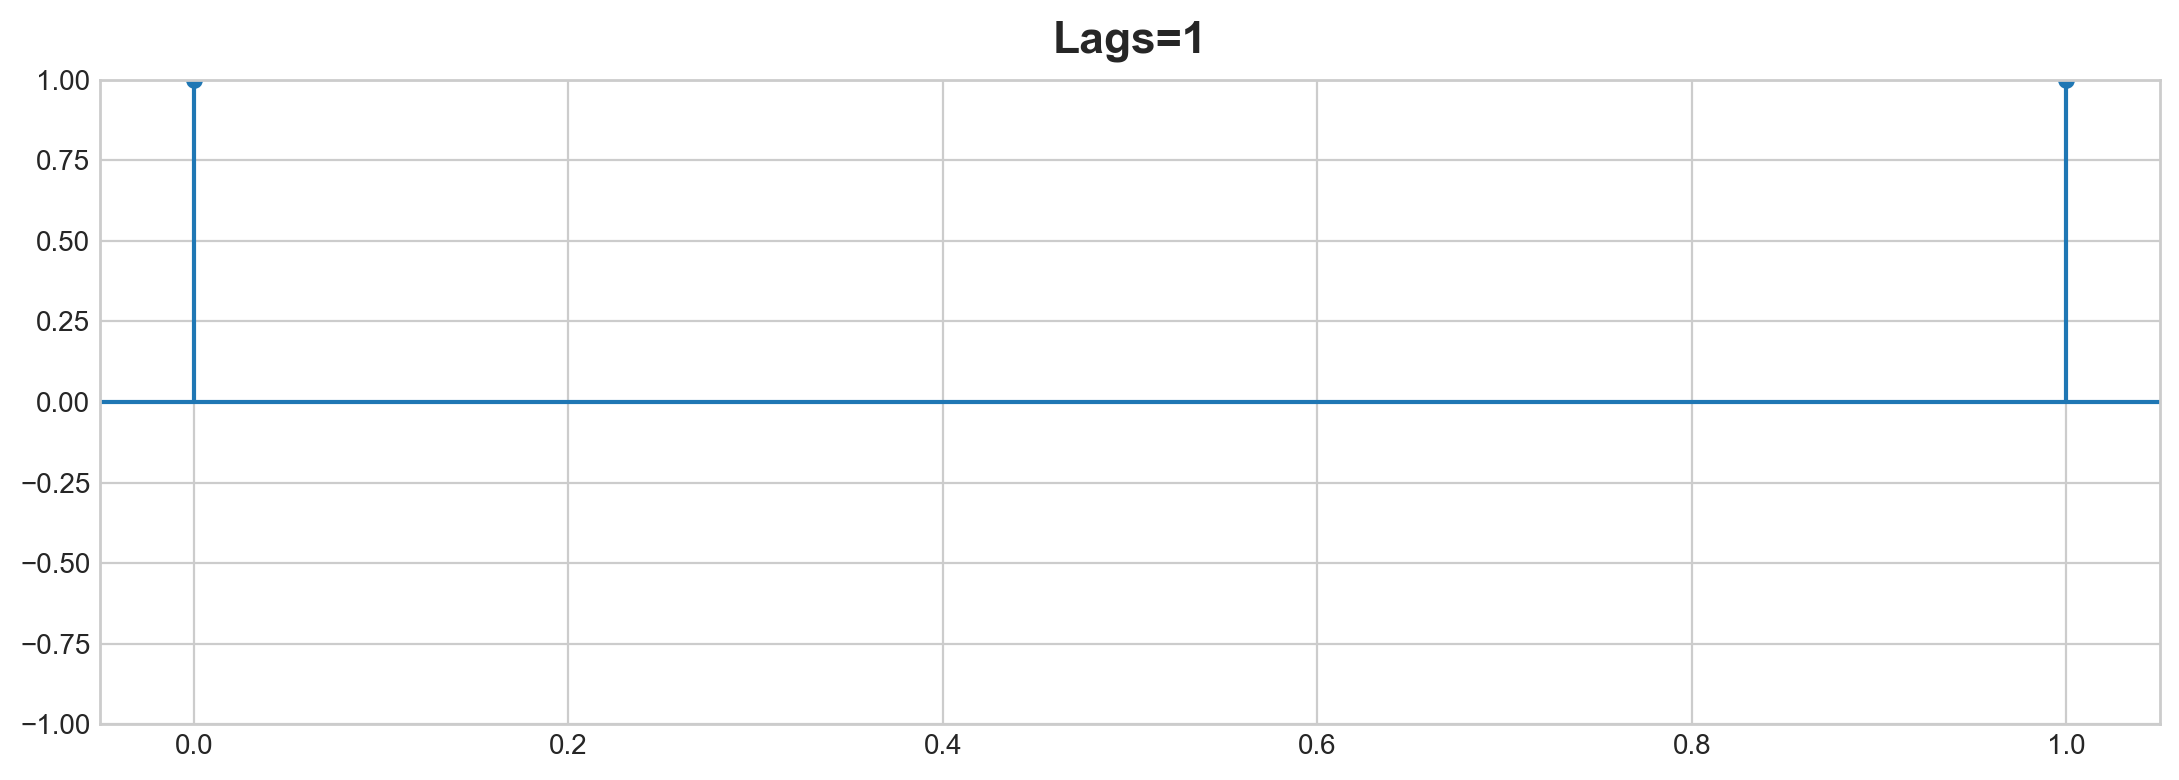

In [27]:
plot_acf(first_x, lags=1, title="Lags=1")

plt.tight_layout()

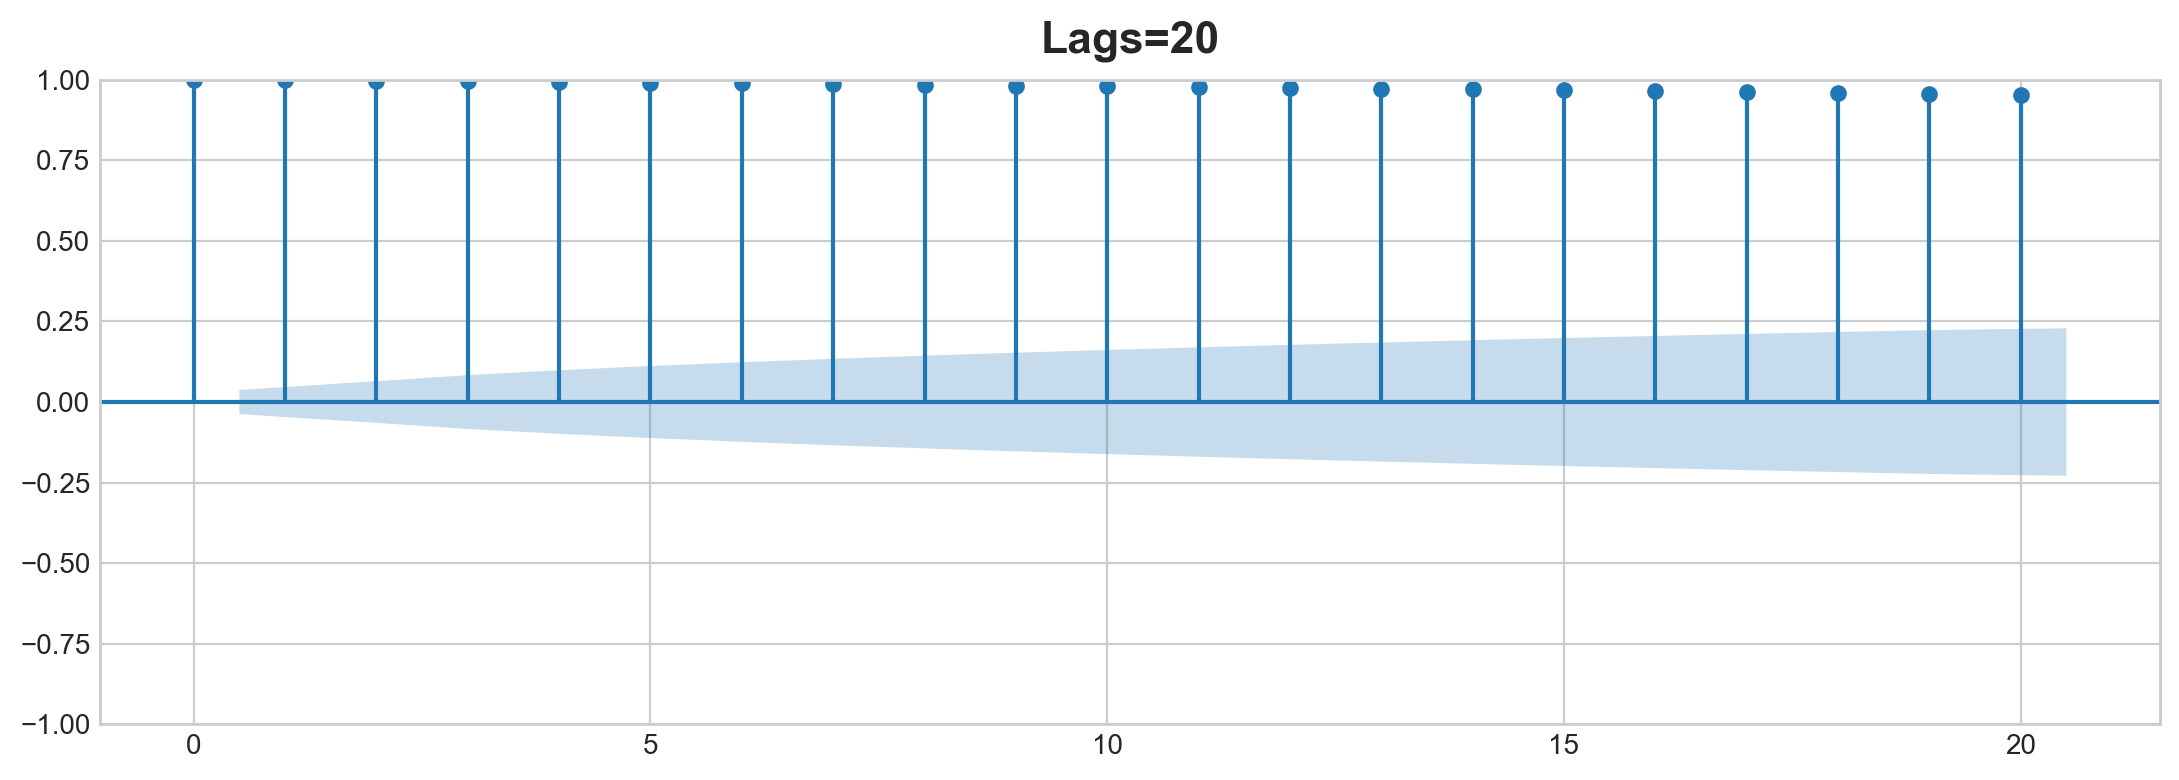

In [28]:
plot_acf(first_x, lags=20, title="Lags=20")

plt.tight_layout()

In [29]:
first_x_diff = np.diff(first_x, n=1)

first_diff_adf_result = adfuller(first_x_diff)

print(f'ADF Statistic: {first_diff_adf_result[0]}')
print(f'p-value: {first_diff_adf_result[1]}')

ADF Statistic: -14.299930739659843
p-value: 1.2340192877704991e-26


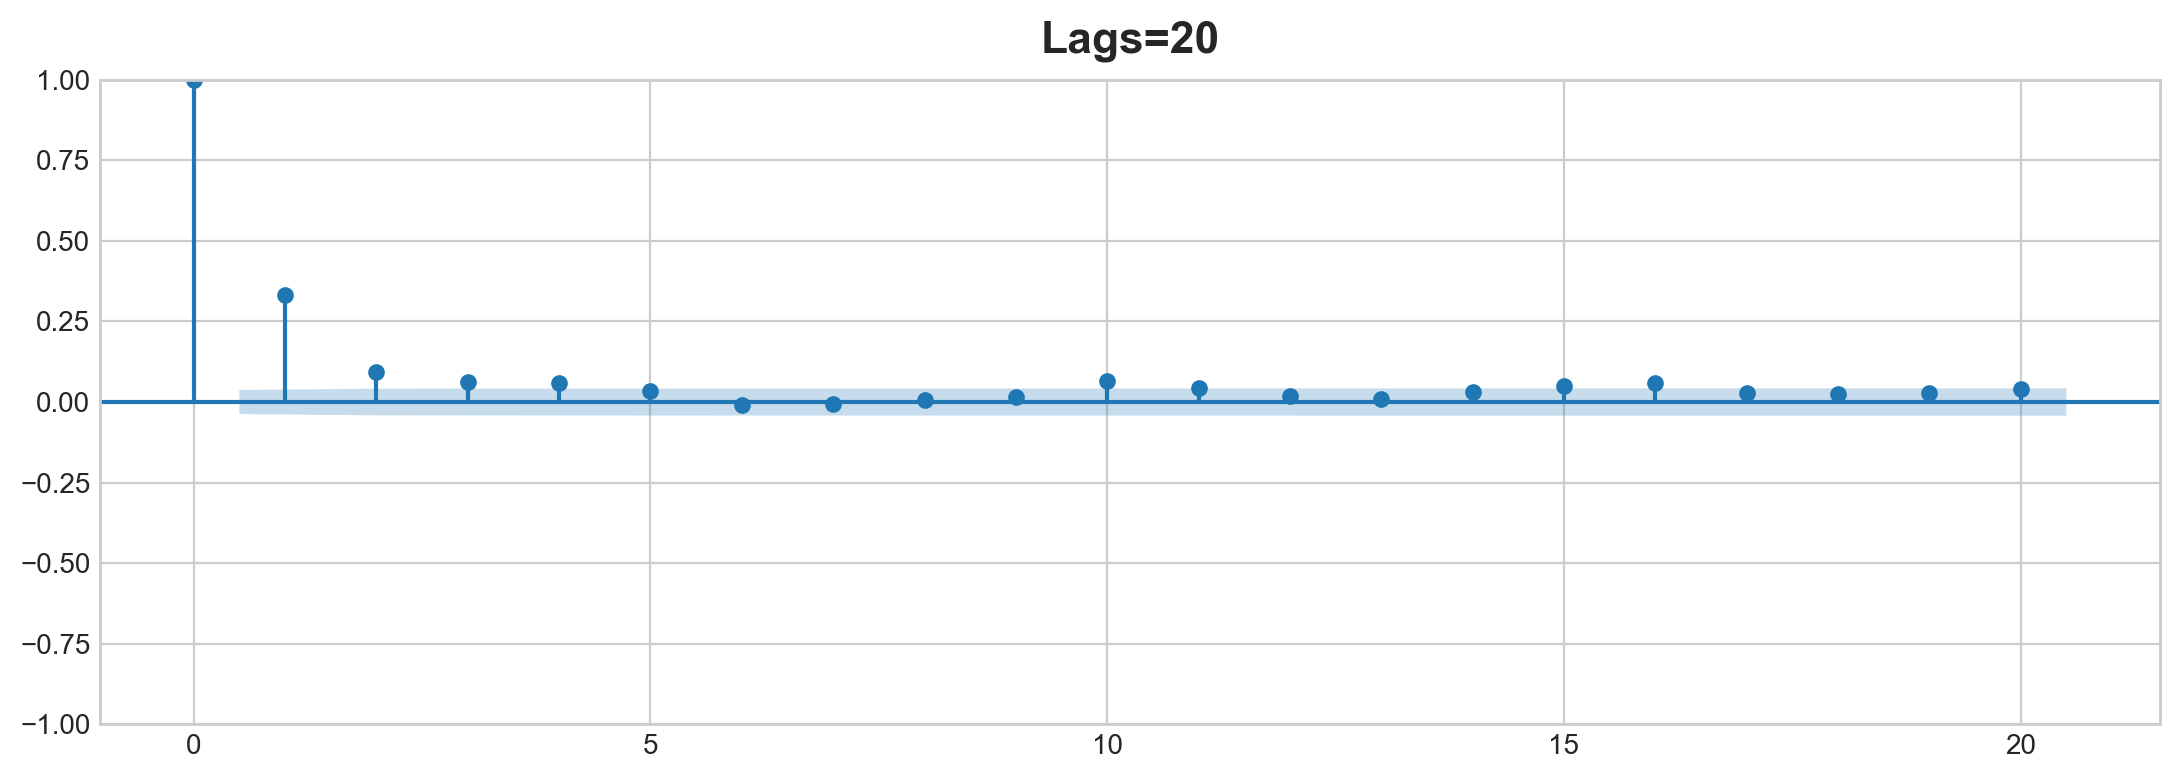

In [30]:
plot_acf(first_x_diff, lags=20, title="Lags=20")

plt.tight_layout()

In [31]:
second_adf_result = adfuller(second_x)

print(f'ADF Statistic: {second_adf_result[0]}')
print(f'p-value: {second_adf_result[1]}')

ADF Statistic: -4.623820237967167
p-value: 0.0001167224474893665


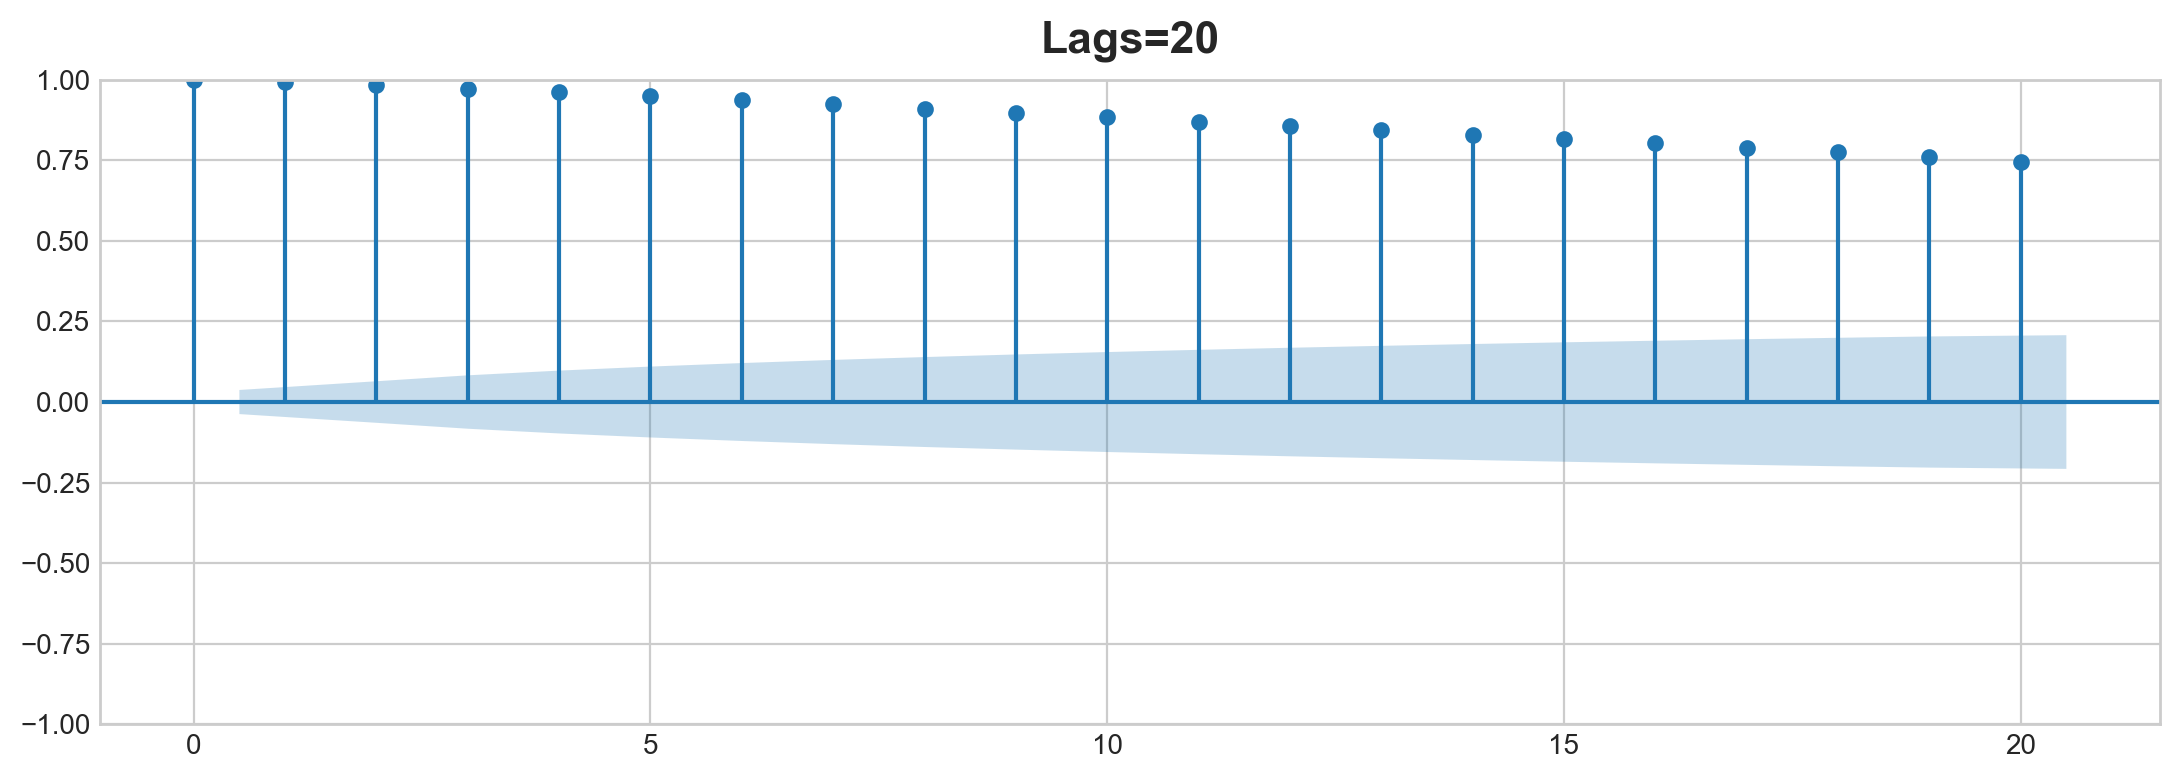

In [32]:
plot_acf(second_x, lags=20, title="Lags=20")

plt.tight_layout()

In [33]:
third_adf_result = adfuller(third_x)

print(f'ADF Statistic: {third_adf_result[0]}')
print(f'p-value: {third_adf_result[1]}')

ADF Statistic: -4.638082164562633
p-value: 0.000109827180791046


## 5.收益率因子的经验分析

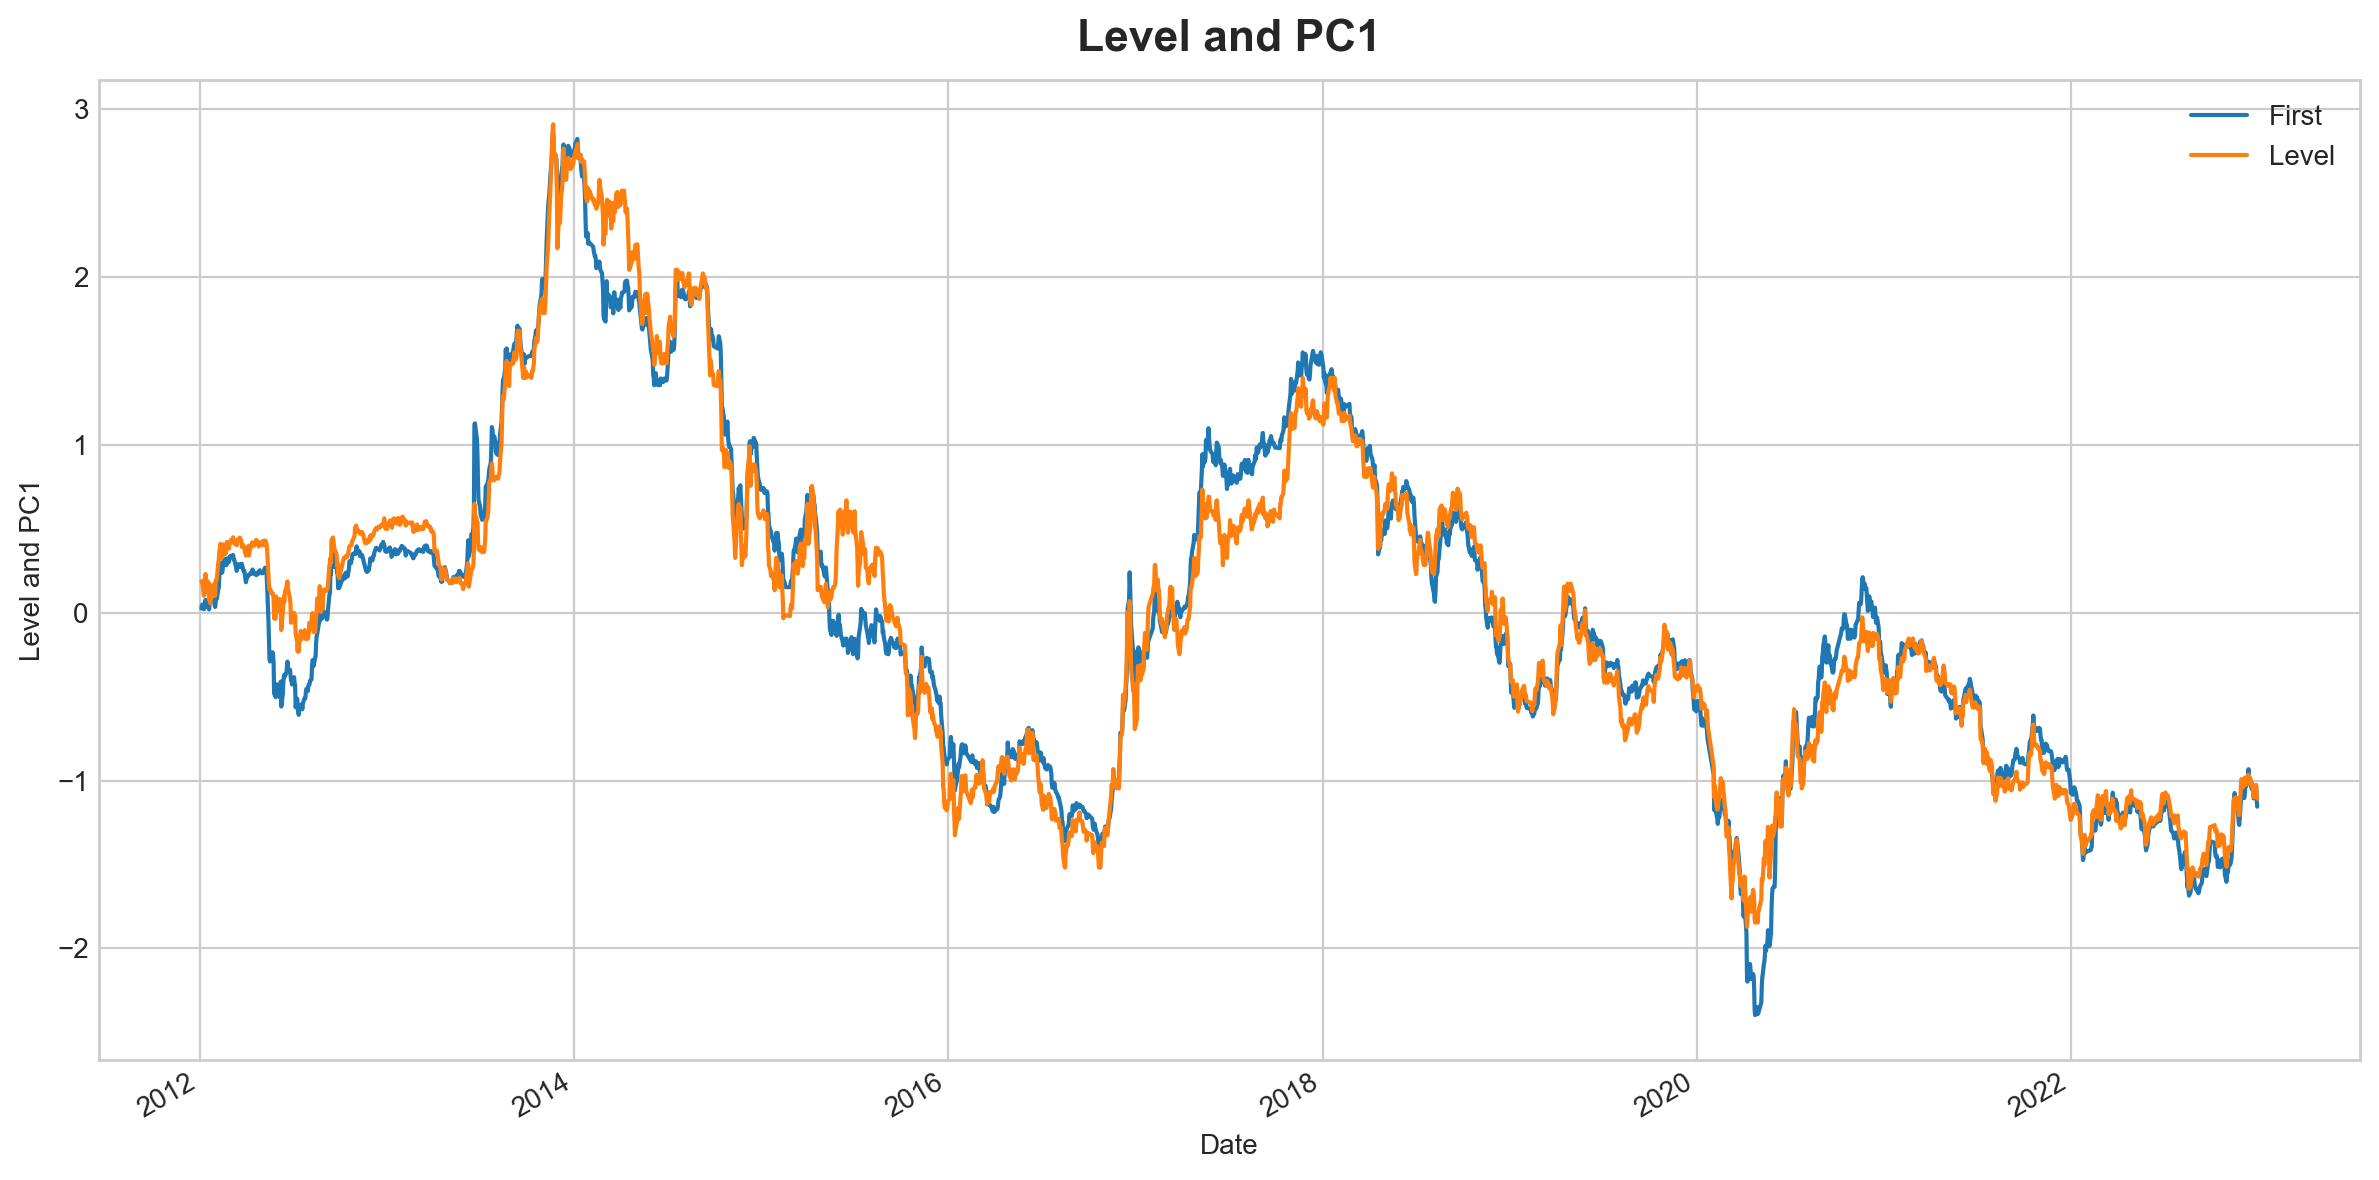

In [34]:
from sklearn.preprocessing import scale
# level - 十年收益率
fig, ax = plt.subplots(figsize=(12, 6))

level = yield_to_maturity_df['10Y']
slope = yield_to_maturity_df['10Y'] - yield_to_maturity_df['6M']
curature = yield_to_maturity_df['6M']  + yield_to_maturity_df['10Y'] - 2 * yield_to_maturity_df['5Y']
ax.plot(yield_to_maturity_df['Date'], scale(first_x), label="First")
ax.plot(yield_to_maturity_df['Date'], scale(level), label="Level")



ax.set_title("Level and PC1")
ax.set_xlabel("Date")
ax.set_ylabel("Level and PC1")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(loc=1)

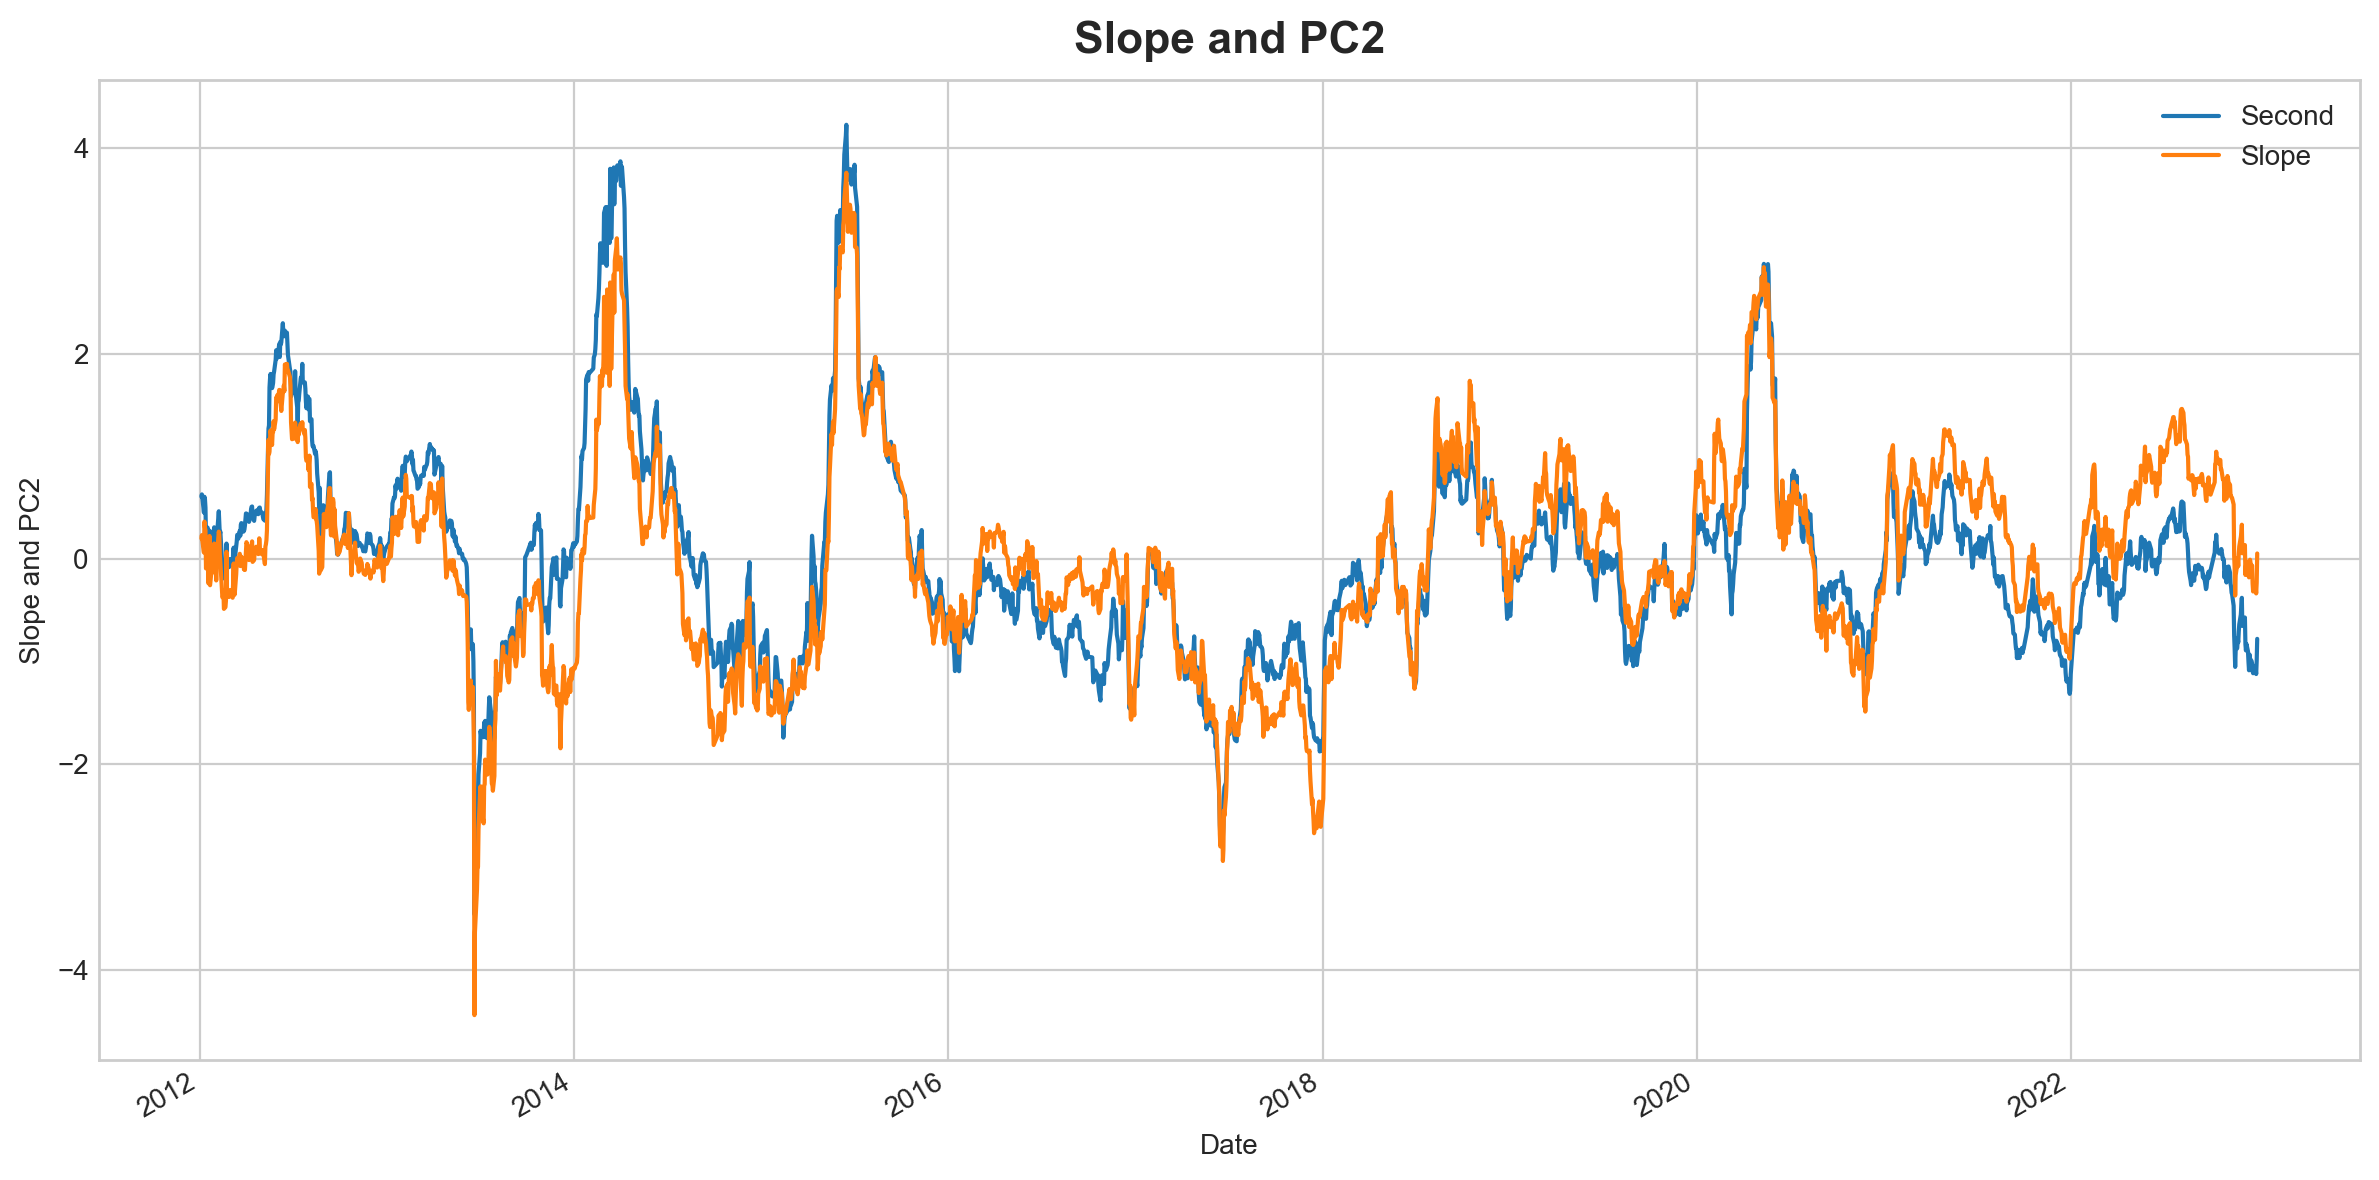

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(yield_to_maturity_df['Date'], scale(second_x), label="Second")
ax.plot(yield_to_maturity_df['Date'], scale(slope), label="Slope")



ax.set_title("Slope and PC2")
ax.set_xlabel("Date")
ax.set_ylabel("Slope and PC2")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(loc=1)

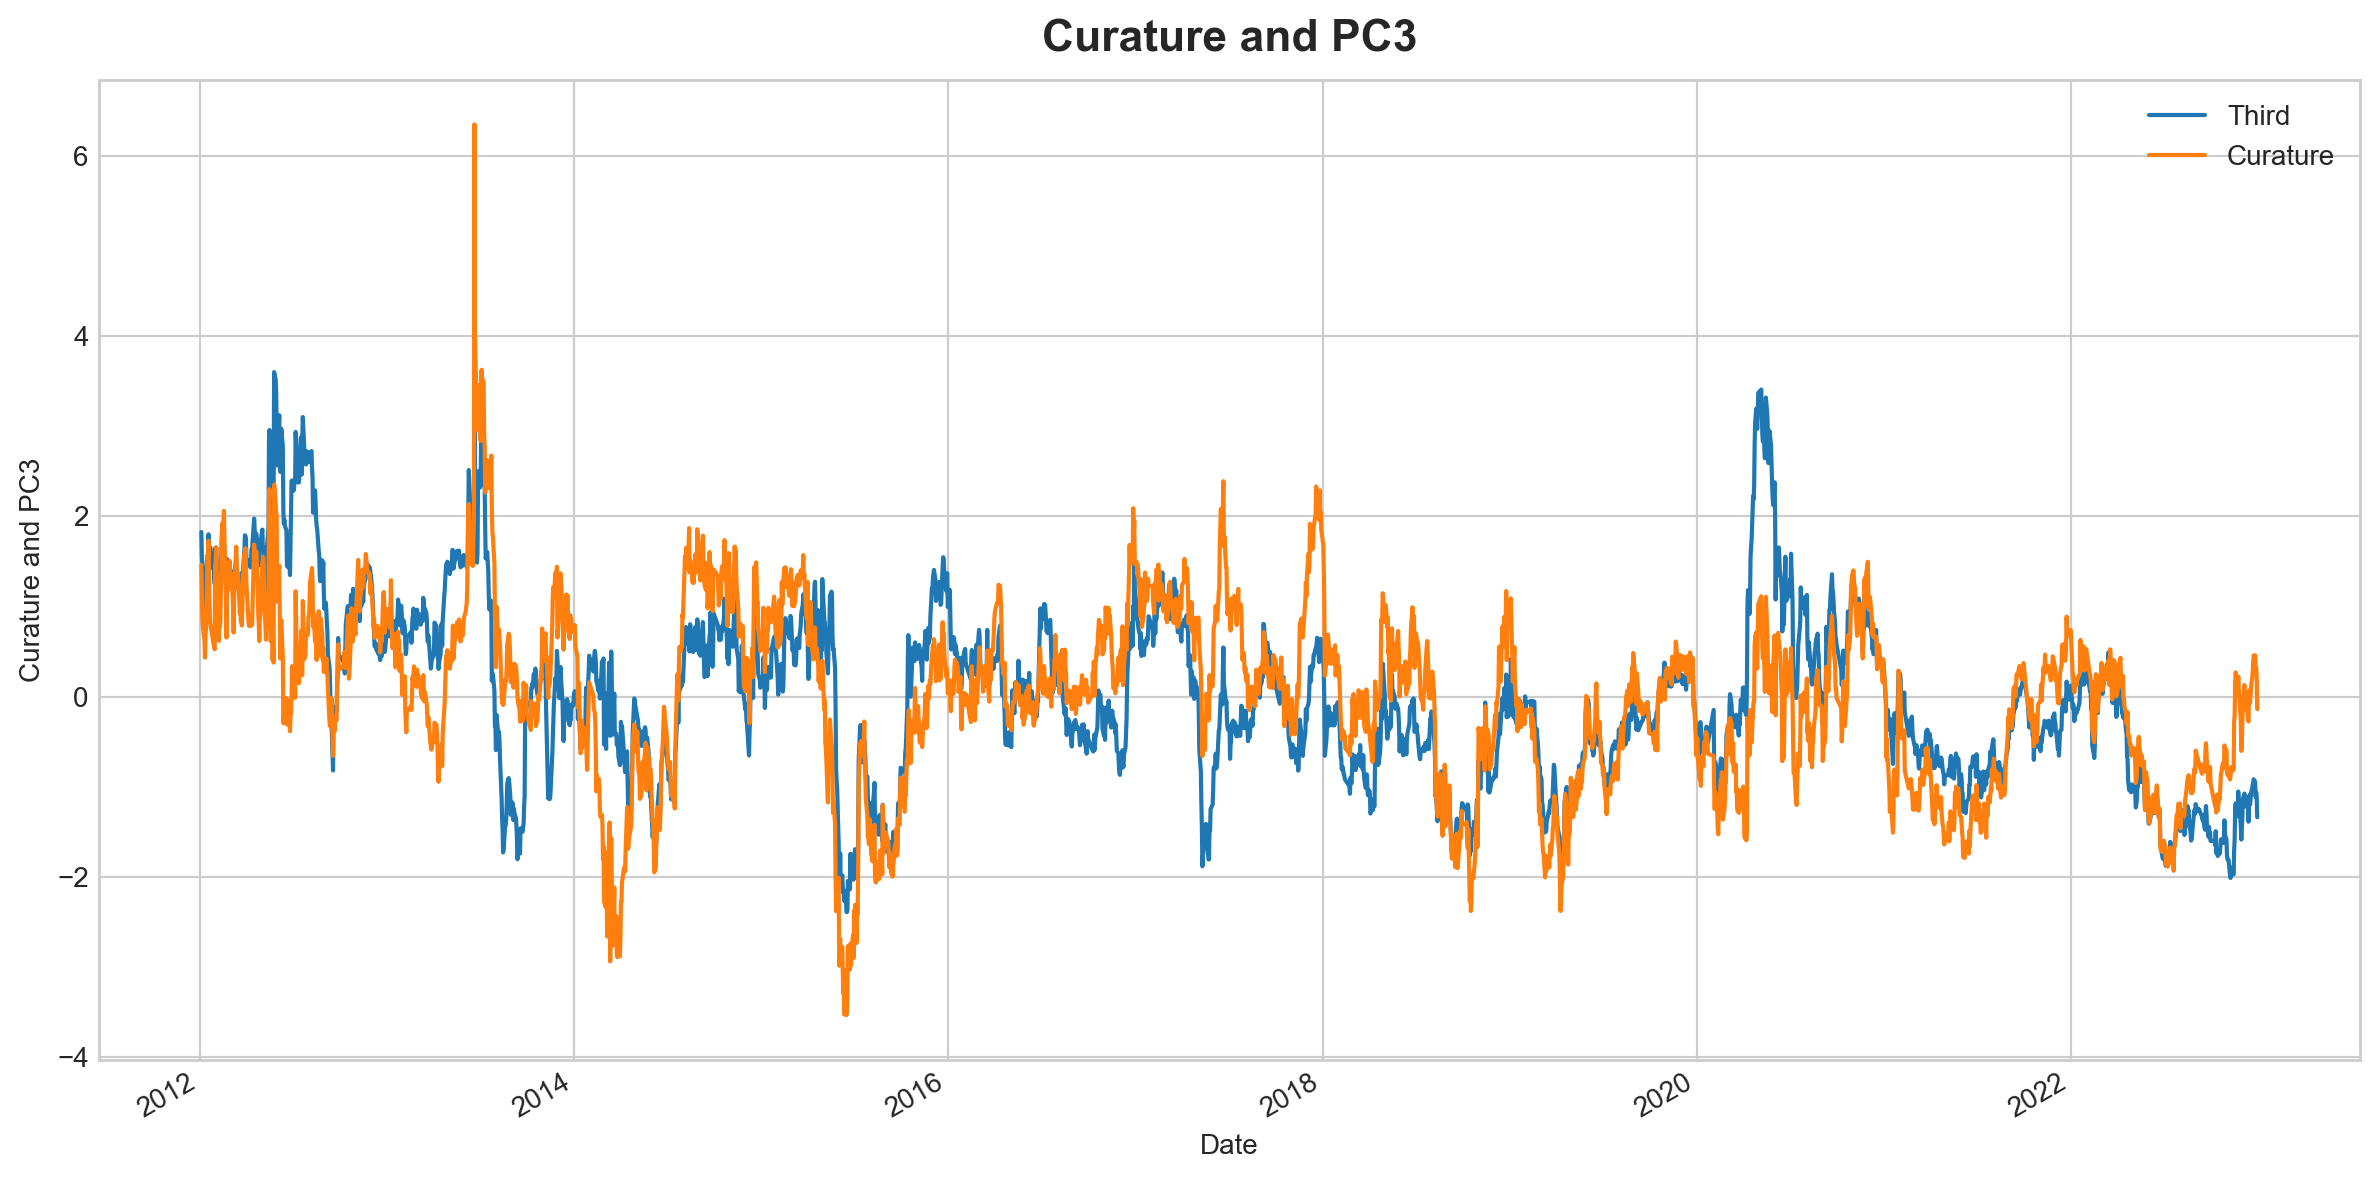

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(yield_to_maturity_df['Date'], scale(third_x), label="Third")
ax.plot(yield_to_maturity_df['Date'], scale(curature), label="Curature")



ax.set_title("Curature and PC3")
ax.set_xlabel("Date")
ax.set_ylabel("Curature and PC3")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(loc=1)